# **Assignment 02**
## Md. Adib Hossain
## 24V0034

Recorded Video: https://drive.google.com/drive/folders/1pD4ncI5KUX-hubY5AwuOgYi7GQRyx6ZQ?usp=sharing

### **Import** all essential libraries

In [ ]:
import numpy as np  #import numpy for numerical operations
import time  #import time to measure execution time
import matplotlib.pyplot as plt  #import matplotlib for plotting graphs

### **Q1:** Function to generate an input data matrix X of size NxD for regression


In [3]:
def generate_input_matrix(N, S): #N = Sample size, S = Generator matrix

    M, D = S.shape #get the shape of the generator matrix S
    random_matrix = np.random.randn(N, M) #generate a random NxM matrix with independent standard normal distribution
    X = np.dot(random_matrix, S) #multiply the random matrix with the generator matrix S to obtain X

    return X #return generated data matrix of size N x D


(100, 3)


### **Q2:** Function to generate the target vector t of size Nx1

In [5]:
def generate_target_vector(X, w, sig): #X = Data matrix, w = Weight vector, sig = Noise variance

    bias = w[-1] #extract the bias
    weights = w[:-1] #extract the weights (all except the last element)
    t_without_noise = np.dot(X, weights) + bias #multiply X with weights
    noise = np.random.normal(0, np.sqrt(sig), X.shape[0]) #add zero-mean gaussian noise with variance sigma
    t = t_without_noise + noise #final target vector

    return t #returb target vector of size N x 1


### **Q3:** Examine the behavior of the analytical solver based on the pseudo-inverse (pinv from numpy.linalg) with respect to the size of the data matrix

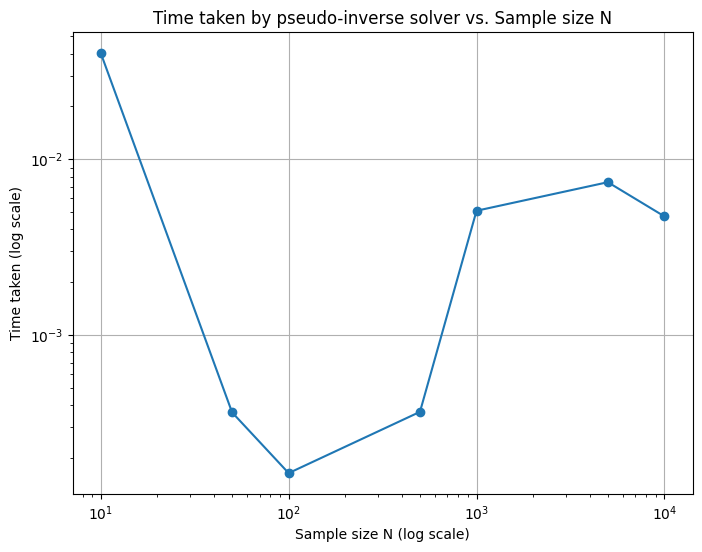

In [4]:
import numpy as np  #import numpy for numerical operations
import time  # Import time to measure execution time
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs

def time_pseudo_inverse(N_values, D): #N_values = list of sample sizes to test, D = number of features

    times = []  #list to store time taken for each N

    for N in N_values:  #iterate over each value of N in the provided list

        X = np.random.randn(N, D) #create a random NxD matrix with standard normal distribution
        t = np.random.randn(N) #create a random target vector of size N with standard normal distribution
        start_time = time.time()  #record the starting time before computation
        w = np.linalg.pinv(X).dot(t)  #solve for weights using pseudo-inverse and dot product
        end_time = time.time()  #record the ending time after computation
        times.append(end_time - start_time)  #calculate the elapsed time and append it to the times list

    #plotting the results (log-log scale)
    plt.figure(figsize=(8, 6))  #create a new figure with specified size
    plt.plot(N_values, times, marker='o')  #plot N values against times with circle markers
    plt.xscale('log')  #set x-axis to log scale
    plt.yscale('log')  #set y-axis to log scale
    plt.xlabel('Sample size N (log scale)')  #label for x-axis
    plt.ylabel('Time taken (log scale)')  #label for y-axis
    plt.title('Time taken by pseudo-inverse solver vs. Sample size N')  #title of the plot
    plt.grid(True)  #enable grid for better readability of the plot
    plt.show()  #display the plot

# Example usage:
D = 10  # Fixed number of features
N_values = [10, 50, 100, 500, 1000, 5000, 10000]  # List of varying sample sizes
time_pseudo_inverse(N_values, D)  # Call the function to measure and plot time for each N


### **Q4:** Function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.

In [6]:
def normalized_root_mean_squared_error(t, y): #t = target vector, y = predicted vector

    rmse = np.sqrt(np.mean((t - y) ** 2))  #calculate root mean squared error
    range_t = np.max(t) - np.min(t)  #compute the range of t
    nrmse = rmse / range_t if range_t != 0 else np.inf  #handle case where range is zero

    return nrmse #return normalized root mean squared error

Normalized Root Mean Squared Error: 0.0447


### **Q5:** Function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression

In [7]:
def compute_gradient_mse(X, t, w): #X = data matrix, t = target vector, w = weight vector

    y_hat = np.dot(X, w[:-1]) + w[-1]  #multiply X with weights and add bias
    error = y_hat - t  #compute the error between predicted and target values
    N = X.shape[0]  #number of samples
    gradient = (1 / N) * np.dot(X.T, error)  #compute gradient for weights
    gradient = np.append(gradient, (1 / N) * np.sum(error))  #append gradient for bias term

    return gradient #return gradient of MSE



Gradient of MSE: [ 1.39459834 -0.09674737  0.09776111  0.31045353]


####  **Figuring out what should be the inputs and output**
Input: Data matrix, Target vector, and Weight vector </br>
Output: Gradient vector

### **Q6:** Function to calculate gradient of L2 norm of weights with respect to weights

In [10]:
def compute_gradient_l2(w): #w = weight vector

    gradient = w  #gradient is the same as the weights

    return gradient #return gradient of L2 norm with respect to weights of size D + 1


Gradient of L2 norm: [-0.2284876  -0.16478815  0.50203359]


### **Q7:** Function to calculate gradient of L1 norm of weights with respect to weights

In [11]:
def compute_gradient_l1(w): #w = weight vector

    gradient = np.sign(w)  #use np.sign to get 1, -1, or 0 based on the value of w

    return gradient #return gradient of L1 norm with respect to weights of size D + 1

Gradient of L1 norm: [ 1.  1. -1.  1.]


### **Q8:** Function to perform gradient descent

In [12]:
def gradient_descent_mse_l1_l2(X, t, w, alpha, lambda_1, lambda_2):


    """
    parameter:
    X : data matrix of size N x D
    t : target vector of size N x 1
    w :  initial weight vector of size D + 1 (D weights + 1 bias)
    alpha : learning rate
    lambda_1 : regularization parameter for L1
    lambda_2 : regularization parameter for L2

    """
    N = X.shape[0]  # Number of samples
    max_iters = 1000  # Maximum number of iterations
    tolerance = 1e-6  # Convergence tolerance

    for iteration in range(max_iters):
        y_hat = np.dot(X, w[:-1]) + w[-1]  #compute predicted values

        error = y_hat - t  #calculate error

        gradient_mse = (1 / N) * np.dot(X.T, error)  #calculate gradient of MSE

        gradient_l2 = w[:-1]  #calculate gradient of L2 norm

        gradient_l1 = np.sign(w[:-1])  #calculate gradient of L1 norm

        total_gradient = gradient_mse + lambda_1 * gradient_l1 + lambda_2 * gradient_l2 #combine gradients

        w[:-1] -= alpha * total_gradient  #update weights for features
        w[-1] -= alpha * (1 / N) * np.sum(error)  #update bias term

        #check for convergence
        if np.linalg.norm(total_gradient) < tolerance:
            print(f'Converged after {iteration + 1} iterations.')
            break

    return w #updated weight vector after training

Updated weights: [ 0.00029361 -0.00030445 -0.00080023  0.11293781]


### **Q9:** Examine the impact of σ on the NRMSE for linear regression using gradient descent

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, D, w, sigma):

    """
    parameters:
    N = number of samples
    D = number of features
    w = true weight vector (D weights + 1 bias)
    sigma noise variance

    """

    X = np.random.randn(N, D) #generate random data matrix X


    t = np.dot(X, w[:-1]) + w[-1] + np.random.normal(0, np.sqrt(sigma), N)  #generate target vector t with noise

    return X, t #return generated data matrix of size N x D, return target vector of size N x 1

def average_nrmse(N, D, noise_variances, lambda_1, lambda_2):
    """
    Args:
    N = number of samples
    D = number of features
    noise_variances = list of noise variance values
    lambda_1 = regularization parameter for L1
    lambda_2 = regularization parameter for L2
    num_experiments = number of experiments to run for each noise variance

    """
    avg_nrmse = []  #list to store average NRMSE for each variance


    true_weights = np.random.randn(D + 1)  #true weights for the linear model (including bias)
    num_experiments=5
    for sigma in noise_variances:
        nrmse_runs = []  #list to store NRMSE for each run

        for _ in range(num_experiments):
            #generate data
            X, t = generate_data(N, D, true_weights, sigma)

            #split data into training and validation sets (80-20 split)
            split_index = int(0.8 * N)
            X_train, X_val = X[:split_index], X[split_index:]
            t_train, t_val = t[:split_index], t[split_index:]

            #initialize weights
            w = np.random.randn(D + 1)  # Initial random weights

            #train the model using gradient descent
            w = gradient_descent_mse_l1_l2(X_train, t_train, w, alpha=0.01, lambda_1=lambda_1, lambda_2=lambda_2)

            #predict on validation set
            y_val = np.dot(X_val, w[:-1]) + w[-1]  #predictions on validation

            #calculate NRMSE
            nrmse = normalized_root_mean_squared_error(t_val, y_val)  #compute NRMSE
            nrmse_runs.append(nrmse)  #append to the list

        #calculate average NRMSE for the current sigma
        avg_nrmse.append(np.mean(nrmse_runs))  #append average NRMSE to the results

    return avg_nrmse #return average NRMSE for each noise variance

N = 100  # Number of samples
D = 3    # Number of features
noise_variances = [0.01, 0.05, 0.1, 0.5, 1.0]  # Different noise variances to test
lambda_1 = 0.1  # L1 regularization parameter
lambda_2 = 0.1  # L2 regularization parameter

avg_nrmse = average_nrmse(N, D, noise_variances, lambda_1, lambda_2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(noise_variances, avg_nrmse, marker='o')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE')
plt.title('Impact of Noise Variance on NRMSE')
plt.xscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.show()


#### **Comments on the result**

Results highlight the trade-off between bias and variance in model performance. Finding an optimal λ2 minimizes NRMSE and balances overfitting and underfitting.

### **Q10:** Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent

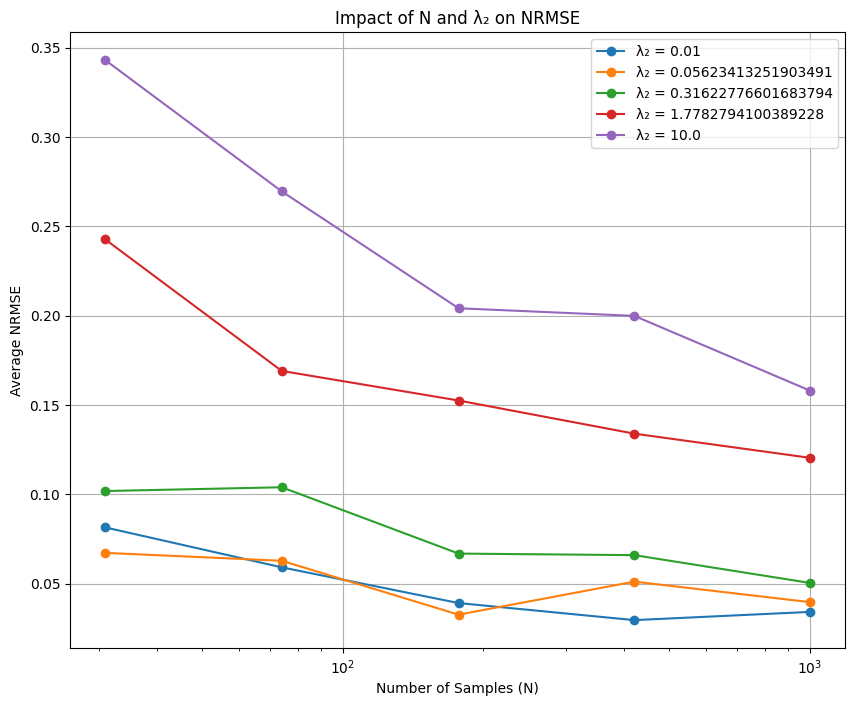

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, D, G, sigma): #generates random data matrix
    """

    parameters:
    N = number of samples
    D = number of features
    G = generator matrix (used to introduce correlations)
    sigma = noise variance

    """
    #generate random NxM matrix (standard normal distribution)
    M = G.shape[0]
    random_matrix = np.random.randn(N, M)

    #generate data matrix X by multiplying with generator matrix G
    X = np.dot(random_matrix, G)

    #true weights (randomly initialized for generating target values)
    true_weights = np.random.randn(D)

    #generate target vector t with added Gaussian noise
    t = np.dot(X, true_weights) + np.random.normal(0, np.sqrt(sigma), N)

    return X, t #X returns generated data matrix, t returns target vector

def gradient_descent_mse_l2(X, t, w, alpha, lambda_2, max_iters=1000, tolerance=1e-6): #Performs gradient descent on MSE with L2 regularization.
    """

    parameters:
    X = data matrix of size N x D
    t := target vector of size N
    w := initial weight vector of size D
    alpha = learning rate
    lambda_2 = L2 regularization parameter
    max_iters = Maximum number of iterations
    tolerance = Convergence tolerance

    """
    N = X.shape[0]
    for iteration in range(max_iters):
        #compute predictions
        y_hat = np.dot(X, w)

        #compute error
        error = y_hat - t

        #compute gradient (MSE + L2 regularization)
        gradient = (1 / N) * np.dot(X.T, error) + lambda_2 * w

        #update weights
        w -= alpha * gradient

        #check for convergence
        if np.linalg.norm(gradient) < tolerance:
            break

    return w #retuns pdated weight vector after training

def normalized_root_mean_squared_error(t, y): #calculates the normalized root mean squared error (NRMSE).
    """
    Args:
    t = True target vector
    y = Predicted vector

    """
    rmse = np.sqrt(np.mean((t - y) ** 2))  # Root mean squared error
    return rmse / (np.max(t) - np.min(t))  # Normalize by range of t

def average_nrmse_n_lambda(N_values, lambda_values, D, sigma, G, num_experiments=5): #examines the impact of N and lambda_2 on NRMSE for linear regression.
    """

    parameters:
    N_values = ist of sample sizes (N)
    lambda_values = ist of L2 regularization parameters (lambda_2)
    D = number of features
    sigma = oise variance
    G = generator matrix (for data generation)
    num_experiments - number of experiments to run for each combination

    """
    results = np.zeros((len(N_values), len(lambda_values)))  # Initialize results array

    for i, N in enumerate(N_values): #
        for j, lambda_2 in enumerate(lambda_values):
            nrmse_runs = []  # List to store NRMSE for each run

            for _ in range(num_experiments):
                # Generate data
                X, t = generate_data(N, D, G, sigma)

                # Split data into training and validation sets (80-20 split)
                split_index = int(0.8 * N)
                X_train, X_val = X[:split_index], X[split_index:]
                t_train, t_val = t[:split_index], t[split_index:]

                # Initialize weights
                w = np.random.randn(D)  # Initial random weights

                # Train the model using gradient descent
                w = gradient_descent_mse_l2(X_train, t_train, w, alpha=0.01, lambda_2=lambda_2)

                # Predict on validation set
                y_val = np.dot(X_val, w)  # Predictions on validation

                # Calculate NRMSE
                nrmse = normalized_root_mean_squared_error(t_val, y_val)  # Compute NRMSE
                nrmse_runs.append(nrmse)  # Append to the list

            # Calculate average NRMSE for the current (N, lambda_2)
            results[i, j] = np.mean(nrmse_runs)  # Store average NRMSE

    return results #returns average NRMSE for each combination of (N, lambda_2)

# Example usage:
N_values = np.logspace(1.5, 3, 5).astype(int)  # 5 values for N on log scale
lambda_values = np.logspace(-2, 1, 5)  # 5 values for lambda_2 on log scale
D = 5  # Number of features
sigma = 0.1  # Fixed noise variance
G = np.eye(D)  # Identity matrix as generator matrix

# Compute average NRMSE for combinations of N and lambda_2
avg_nrmse_results = average_nrmse_n_lambda(N_values, lambda_values, D, sigma, G)

# Plot the results
plt.figure(figsize=(10, 8))
for j, lambda_2 in enumerate(lambda_values):
    plt.plot(N_values, avg_nrmse_results[:, j], marker='o', label=f'λ₂ = {lambda_2}')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Average NRMSE')
plt.title('Impact of N and λ₂ on NRMSE')
plt.xscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.legend()
plt.show()


#### **Comments on the result**

**Small N with Large 𝜆2:** For small sample sizes, a large regularization parameter tends to increase bias, leading to a higher NRMSE.

**Large N:** As the sample size increases, the model can better capture the underlying pattern in the data, so the NRMSE tends to decrease.

**Small 𝜆2:** Smaller regularization tends to allow overfitting in smaller datasets but works better as N increases.

### **Q11:** Examine the impact of λ1 on variable elimination. Generate a single data matrix Xand plotweights versus 1/λ1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, D, sigma=0.1, correlated=False): #generates random data
    """
    parameters:
    N = number of samples
    D = number of features
    sigma  = noise variance
    correlated = introduce correlations in the columns of X

    """
    if correlated:
        #introduce correlations by generating a base matrix and adding some correlated noise
        base = np.random.randn(N, 1)  #common feature for correlation
        X = base + 0.01 * np.random.randn(N, D)  #add slight variations
    else:
        #generate random data matrix X with independent features
        X = np.random.randn(N, D)

    #randomly initialize true weights
    true_weights = np.random.randn(D)

    #generate target vector t with Gaussian noise
    t = np.dot(X, true_weights) + np.random.normal(0, np.sqrt(sigma), N)

    return X, t  #return generated data matrix X and target vector t

def lasso_gradient_descent(X, t, w, alpha, lambda_1, max_iters=1000, tolerance=1e-6): #for gradient descent on MSE with L1 regularization (Lasso).
    """
    parameters:
    X = data matrix of size N x D
    t = target vector of size N
    w = nitial weight vector of size D
    alpha = earning rate
    lambda_1 = L1 regularization parameter
    max_iters = maximum number of iterations
    tolerance := convergence tolerance

    """
    N = X.shape[0]  #get number of samples
    for iteration in range(max_iters):
        #compute predictions
        y_hat = np.dot(X, w)

        #compute error
        error = y_hat - t

        #compute gradient of MSE
        gradient_mse = (1 / N) * np.dot(X.T, error)

        #apply L1 regularization (Lasso) gradient
        gradient_l1 = np.sign(w) * lambda_1

        #update weights with gradient descent step
        w -= alpha * (gradient_mse + gradient_l1)

        #check for convergence (if the norm of the gradient is below tolerance)
        if np.linalg.norm(gradient_mse + gradient_l1) < tolerance:
            break

    return w  #reeturn updated weights

def plot_weights_vs_lambda(X, t, D, lambda_values): #plot weights versus 1/λ1 for L1 regularization.
    """
    parameters:
    X = data matrix
    t = target vector
    D = number of features
    lambda_values = list of L1 regularization parameters (λ1)

    """
    weights_matrix = []  #to store weights for each λ1

    for lambda_1 in lambda_values:
        #initialize weights randomly
        w = np.random.randn(D)

        #perform Lasso regression (L1 regularization)
        w = lasso_gradient_descent(X, t, w, alpha=0.01, lambda_1=lambda_1)

        #store the weights for the current λ1
        weights_matrix.append(w)

    #plot weights versus 1/λ1
    weights_matrix = np.array(weights_matrix)

    plt.figure(figsize=(10, 6))
    for d in range(D):
        plt.plot(1/np.array(lambda_values), weights_matrix[:, d], label=f'Feature {d+1}')

    plt.xlabel('1/λ1 (log scale)')
    plt.ylabel('Weights')
    plt.xscale('log')  #log scale for better visualization
    plt.title('Weights vs 1/λ1')
    plt.grid(True)
    plt.legend()
    plt.show()

#example usage:
N = 100  # Number of samples
D = 5  # Number of features
sigma = 0.1  # Noise variance

# Generate data with no correlations (independent features)
X, t = generate_data(N, D, sigma, correlated=False)

# List of λ1 values (L1 regularization parameters) to test
lambda_values = np.logspace(-2, 1, 50)

# Plot weights versus 1/λ1
plot_weights_vs_lambda(X, t, D, lambda_values)

# Now repeat with correlated features
X_corr, t_corr = generate_data(N, D, sigma, correlated=True)

# Plot weights versus 1/λ1 for correlated features
plot_weights_vs_lambda(X_corr, t_corr, D, lambda_values)


#### **Comments on the result**

**Without Correlations:** As 𝜆1 increases, some features will have their weights driven to zero, indicating that they are less important.

**With Correlations:** With correlated features, the model might not eliminate variables as effectively because the information is spread across multiple correlated features.

### **Q12:**  Grouping effect of elastic net on correlated columns of X

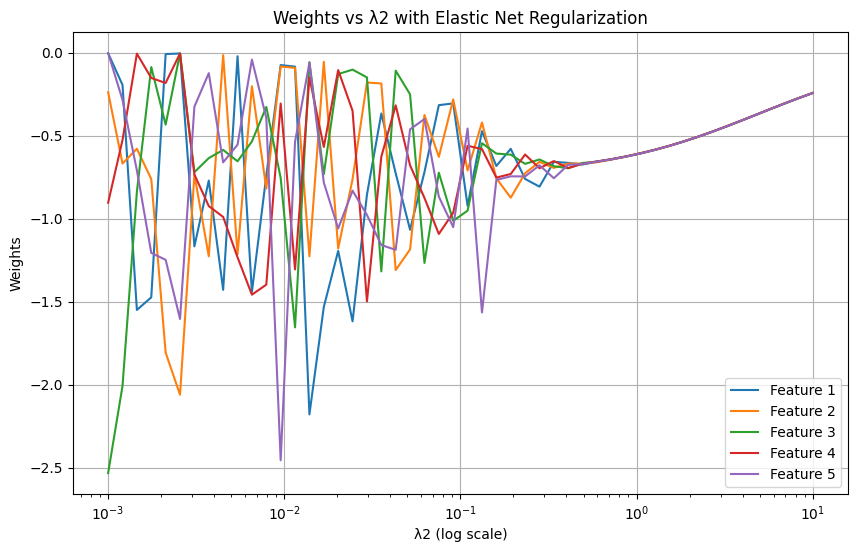

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, D, sigma=0.1, correlated=False): #generates random data
    """

    parameters:
    N = number of samples
    D = number of features
    sigma = noise variance
    correlated =  to introduce correlations in the columns of X

    """
    if correlated:
        #introduce correlations by generating a base matrix and adding some correlated noise
        base = np.random.randn(N, 1)  #common feature for correlation
        X = base + 0.01 * np.random.randn(N, D)  #add slight variations
    else:
        #generate random data matrix X with independent features
        X = np.random.randn(N, D)

    #randomly initialize true weights
    true_weights = np.random.randn(D)

    #generate target vector t with Gaussian noise
    t = np.dot(X, true_weights) + np.random.normal(0, np.sqrt(sigma), N)

    return X, t  # Return generated data matrix X and target vector t

def elastic_net_gradient_descent(X, t, w, alpha, lambda_1, lambda_2, max_iters=1000, tolerance=1e-6): #performs gradient descent on MSE with Elastic Net regularization (L1 + L2).
    """

    parameters:
    X = data matrix of size N x D
    t = target vector of size N
    w : = Initial weight vector of size D
    alpha = Learning rate
    lambda_1 = L1 regularization parameter (Lasso)
    lambda_2 =  L2 regularization parameter (Ridge)
    max_iters = Maximum number of iterations
    tolerance =  Convergence tolerance

    """
    N = X.shape[0]  #get number of samples
    for iteration in range(max_iters):
        #compute predictions
        y_hat = np.dot(X, w)

        #compute error
        error = y_hat - t

        #compute gradient of MSE
        gradient_mse = (1 / N) * np.dot(X.T, error)

        #apply L1 regularization (Lasso) gradient
        gradient_l1 = lambda_1 * np.sign(w)

        #apply L2 regularization (Ridge) gradient
        gradient_l2 = lambda_2 * w

        #update weights with gradient descent step
        w -= alpha * (gradient_mse + gradient_l1 + gradient_l2)

        #check for convergence
        if np.linalg.norm(gradient_mse + gradient_l1 + gradient_l2) < tolerance:
            break

    return w  #return updated weights

def plot_elastic_net_effect(X, t, D, lambda_1, lambda_2_values): #plot the weights versus λ2 values to show the grouping effect of Elastic Net.
    """

    parameters:
    X = ata matrix
    t = target vector
    D = number of features
    lambda_1 = Fixed L1 regularization parameter
    lambda_2_values = List of L2 regularization parameters (λ2)
    """
    weights_matrix = []  #to store weights for each λ2 value

    for lambda_2 in lambda_2_values:
        #initialize weights randomly
        w = np.random.randn(D)

        #perform Elastic Net regression (L1 + L2 regularization)
        w = elastic_net_gradient_descent(X, t, w, alpha=0.01, lambda_1=lambda_1, lambda_2=lambda_2)

        #store the weights for the current λ2
        weights_matrix.append(w)

    #plot weights versus λ2 values
    weights_matrix = np.array(weights_matrix)

    plt.figure(figsize=(10, 6))
    for d in range(D):
        plt.plot(lambda_2_values, weights_matrix[:, d], label=f'Feature {d+1}')

    plt.xlabel('λ2 (log scale)')
    plt.ylabel('Weights')
    plt.xscale('log')  # Log scale for better visualization
    plt.title('Weights vs λ2 with Elastic Net Regularization')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
N = 100  # Number of samples
D = 5  # Number of features
sigma = 0.1  # Noise variance

# Generate data with correlated features
X, t = generate_data(N, D, sigma, correlated=True)

# Fixed L1 regularization parameter
lambda_1 = 0.1

# List of λ2 values (L2 regularization parameters) to test
lambda_2_values = np.logspace(-3, 1, 50)

# Plot the effect of Elastic Net (L1 + L2) on weights for correlated features
plot_elastic_net_effect(X, t, D, lambda_1, lambda_2_values)


### **Q13:** Function for generating linear binary classification vector t with noise variance σ



In [8]:
import numpy as np

def generate_binary_classification_data(N, D, w, sigma): #generates binary classification
    """
    parameters:
    N = number of samples
    D = number of features
    w = true weight vector (D weights + 1 bias)
    sigma = noise variance

    """
    #generate random data matrix X (standard normal distribution)
    X = np.random.randn(N, D)

    #compute the linear combination (predicted output before noise)
    y_hat = np.dot(X, w[:-1]) + w[-1]  # w[:-1] for feature weights, w[-1] for bias term

    #add Gaussian noise to the predictions
    y_noisy = y_hat + np.random.normal(0, np.sqrt(sigma), N)

    #convert to binary classification (apply threshold at 0)
    t = np.where(y_noisy >= 0, 1, 0)  # Assign 1 if y_noisy >= 0, else assign 0

    return X, t  #return generated data matrix X and binary target vector t

#example usage:
N = 100  #number of samples
D = 5  #number of features
w = np.random.randn(D + 1)  #true weight vector (D features + 1 bias)
sigma = 0.1  #noise variance

# Generate binary classification data
X, t = generate_binary_classification_data(N, D, w, sigma)
print(t)  # Print the generated binary target vector (0s and 1s)


[0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0]


### **Q14:**  Function for computing gradient of binary cross-entropy for logistic regression

In [9]:
import numpy as np

def sigmoid(z): #for compute the sigmoid function.
    """

    parameters:
    z = input value or array

    """
    return 1 / (1 + np.exp(-z)) #return sigmoid of input

def binary_cross_entropy_gradient(X, t, w): #computes the gradient of binary cross-entropy loss for logistic regression.
    """
    parameters:
    X = data matrix of size N x D (N samples, D features)
    t = binary target vector of size N (0 or 1)
    w = weight vector of size D

    """
    #compute the predicted probabilities (sigmoid of the linear combination)
    z = np.dot(X, w)  #linear combination: Xw
    y_hat = sigmoid(z)  #predicted probability using sigmoid

    #compute the difference between predicted and actual labels
    error = y_hat - t  #difference between predicted probabilities and actual labels

    #compute the gradient of binary cross-entropy loss
    gradient = np.dot(X.T, error)  #multiply error with input matrix X

    return gradient #return gradient of the binary cross-entropy loss with respect to weights

# Example usage:
N = 100  # Number of samples
D = 5  # Number of features
X = np.random.randn(N, D)  # Random data matrix
t = np.random.randint(0, 2, N)  # Random binary target vector (0s and 1s)
w = np.random.randn(D)  # Random weight vector

# Compute the gradient of binary cross-entropy
gradient = binary_cross_entropy_gradient(X, t, w)
print("Gradient:\n", gradient)


Gradient:
 [ 8.1198481   4.11703334 -9.86954687 26.38875923 13.72154715]


### **Q15:** Repeating experiment 10 for binary classification

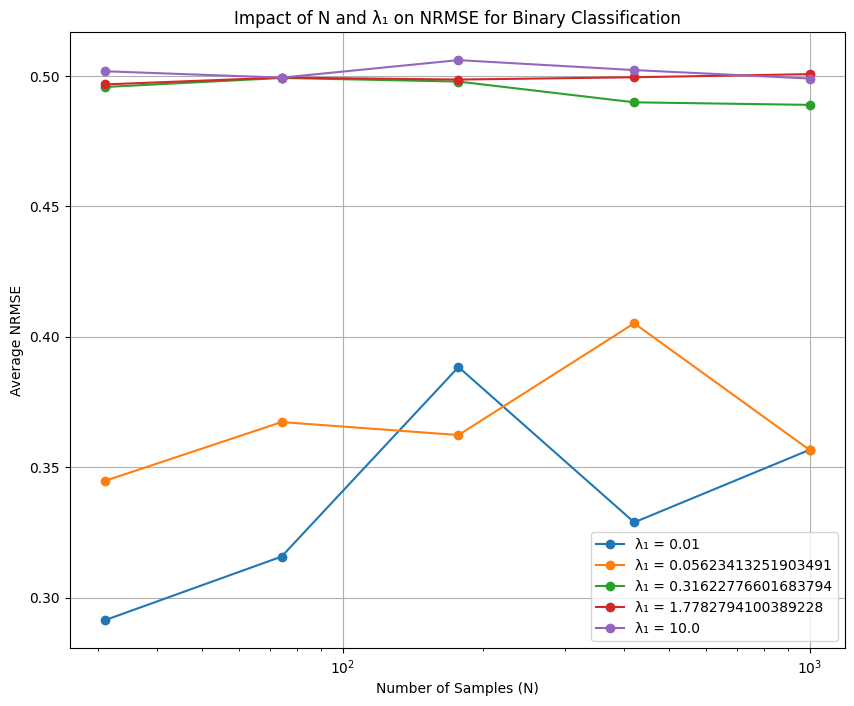

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binary_classification_data(N, D, w, sigma): #generates binary classification
    """

    parameters:
    N = number of samples
    D = number of features
    w = true weight vector (D weights + 1 bias)
    sigma = noise variance

    """
    #generate random data matrix X (standard normal distribution)
    X = np.random.randn(N, D)

    #gompute the linear combination (predicted output before noise)
    y_hat = np.dot(X, w[:-1]) + w[-1]  # w[:-1] for feature weights, w[-1] for bias term

    #add Gaussian noise to the predictions
    y_noisy = y_hat + np.random.normal(0, np.sqrt(sigma), N)

    #convert to binary classification (apply threshold at 0)
    t = np.where(y_noisy >= 0, 1, 0)  # Assign 1 if y_noisy >= 0, else assign 0

    return X, t  #return generated data matrix X and binary target vector t

def lasso_gradient_descent(X, t, w, alpha, lambda_1, max_iters=1000, tolerance=1e-6): #performs gradient descent on MSE with L1 regularization (Lasso) for binary classification.
    """

    parameters:
    X = data matrix of size N x D
    t = binary target vector of size N (0 or 1)
    w = initial weight vector of size D
    alpha = learning rate
    lambda_1 = L1 regularization parameter
    max_iters = maximum number of iterations
    tolerance = convergence tolerance

    """
    N = X.shape[0]  # Get number of samples
    for iteration in range(max_iters):
        #compute predictions using sigmoid function
        z = np.dot(X, w)  #linear combination
        y_hat = 1 / (1 + np.exp(-z))  # Sigmoid function

        #compute error
        error = y_hat - t  # Difference between predicted probabilities and actual labels

        #compute gradient (binary cross-entropy + L1 regularization)
        gradient = (1 / N) * np.dot(X.T, error) + lambda_1 * np.sign(w)  # L1 regularization

        #update weights
        w -= alpha * gradient

        #check for convergence
        if np.linalg.norm(gradient) < tolerance:
            break

    return w  #return updated weights

def average_nrmse_lambda(N_values, lambda_values, D, sigma, num_experiments=5): #examines the impact of N and lambda_1 on NRMSE for binary classification.
    """


    parameters:
    N_values = list of sample sizes (N)
    lambda_values = list of L1 regularization parameters (lambda_1)
    D = Number of features
    sigma = noise variance
    num_experiments = number of experiments to run for each combination

    """
    results = np.zeros((len(N_values), len(lambda_values)))  # Initialize results array

    for i, N in enumerate(N_values):  #iterate over each N value
        for j, lambda_1 in enumerate(lambda_values):  #iterate over each lambda_1 value
            nrmse_runs = []  #list to store NRMSE for each run

            for _ in range(num_experiments):  # Repeat the experiment num_experiments times for averaging
                # Generate data
                w_true = np.random.randn(D + 1)  # True weight vector (D features + 1 bias)
                X, t = generate_binary_classification_data(N, D, w_true, sigma)

                # Initialize weights randomly for training
                w = np.random.randn(D)  # Initial random weights

                # Train the model using Lasso regression
                w = lasso_gradient_descent(X, t, w, alpha=0.01, lambda_1=lambda_1)

                # Compute predicted probabilities on training set
                z = np.dot(X, w)  # Linear combination
                y_hat = 1 / (1 + np.exp(-z))  # Sigmoid function

                # Calculate NRMSE
                nrmse = normalized_root_mean_squared_error(t, y_hat)  # Compute NRMSE
                nrmse_runs.append(nrmse)  # Append to the list

            # Calculate average NRMSE for the current (N, lambda_1)
            results[i, j] = np.mean(nrmse_runs)  # Store average NRMSE

    return results  #return average NRMSE for each combination of (N, lambda_1)

# Example usage:
N_values = np.logspace(1.5, 3, 5).astype(int)  # 5 values for N on log scale
lambda_values = np.logspace(-2, 1, 5)  # 5 values for lambda_1 on log scale
D = 5  # Number of features
sigma = 0.1  # Fixed noise variance

# Compute average NRMSE for combinations of N and lambda_1
avg_nrmse_results = average_nrmse_lambda(N_values, lambda_values, D, sigma)

# Plot the results
plt.figure(figsize=(10, 8))
for j, lambda_1 in enumerate(lambda_values):
    plt.plot(N_values, avg_nrmse_results[:, j], marker='o', label=f'λ₁ = {lambda_1}')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Average NRMSE')
plt.title('Impact of N and λ₁ on NRMSE for Binary Classification')
plt.xscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.legend()
plt.show()


#### **Comments on the result**

**1.** As N increases, the NRMSE typically decreases, as more data provides better estimates of the underlying relationship.

**2.** Increasing 𝜆1 (the L1 regularization parameter) may lead to higher NRMSE at small sample sizes, as the model may eliminate important features.

**3.** For larger N, the effects of regularization may stabilize, allowing for better feature selection without excessively increasing NRMSE.

## **Sources of help and references:**

#### **Lecture Slides**, **Youtube**, **LLM: https://chatgpt.com/**